In [19]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv("Global YouTube Statistics.csv",encoding="latin-1")

In [21]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [23]:
df.shape

(995, 28)

In [24]:
df.isnull().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [25]:
df = df.rename(columns={'Country': 'country'})

In [26]:
df['channel_type'].value_counts()

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

In [31]:
youtubers_distribution_by_channel_type = df['channel_type'].value_counts()
youtubers_distribution_by_channel_type

channel_type
Entertainment    304
Music            216
People           101
Games             98
Comedy            51
Education         49
Film              42
Howto             36
News              30
Tech              17
Sports            13
Autos              3
Animals            3
Nonprofit          2
Name: count, dtype: int64

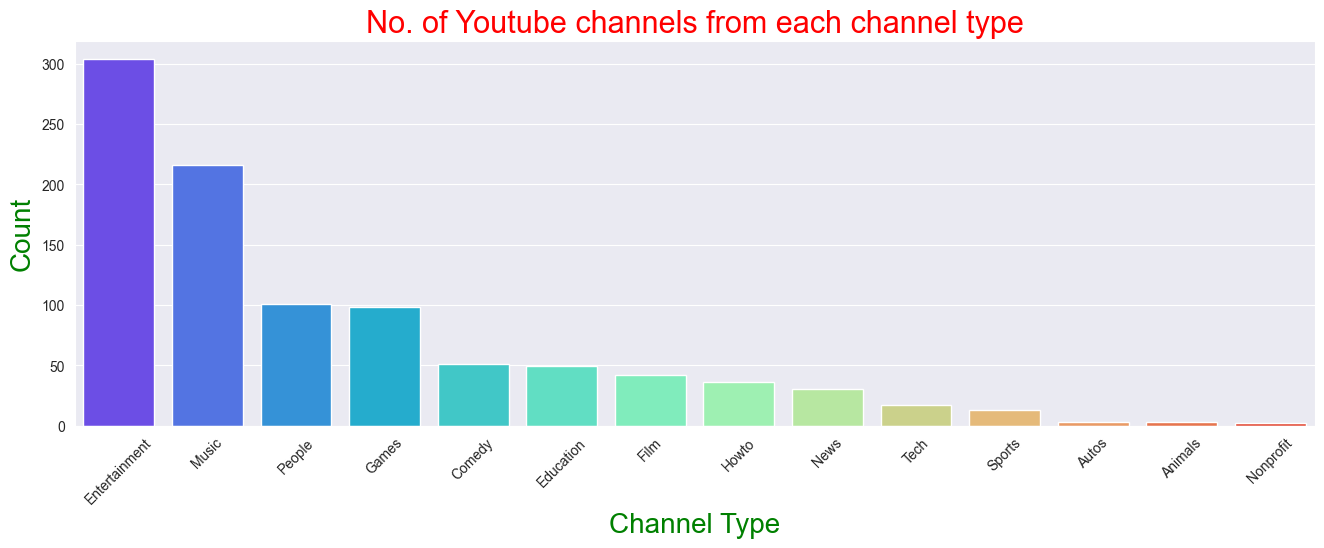

In [29]:
plt.figure(figsize=(16, 5))
sns.barplot(x=youtubers_distribution_by_channel_type.index, y=youtubers_distribution_by_channel_type.values, palette='rainbow')
plt.ylabel('Count', color='green', size=20)
plt.xlabel('Channel Type', color='green', size=20)
plt.title('No. of Youtube channels from each channel type', color='red', size=22)
plt.xticks(rotation=45)  # Rotate the channel types for better readability

plt.show()

In [11]:
# Sort the DataFrame by the 'subscribers' column in descending order and select the top 10
top_10_youtubers_by_subscribers = df[['Youtuber', 'subscribers']].sort_values(by='subscribers', ascending=False).head(10)

# Display the top 10 YouTubers with only 'youtuber' and 'subscribers' columns
top_10_youtubers_by_subscribers

,Youtuber,subscribers
0,T-Series,245000000
1,YouTube Movies,170000000
2,MrBeast,166000000
3,Cocomelon - Nursery Rhymes,162000000
4,SET India,159000000
5,Music,119000000
6,ýýý Kids Diana Show,112000000
7,PewDiePie,111000000
8,Like Nastya,106000000
9,Vlad and Niki,98900000


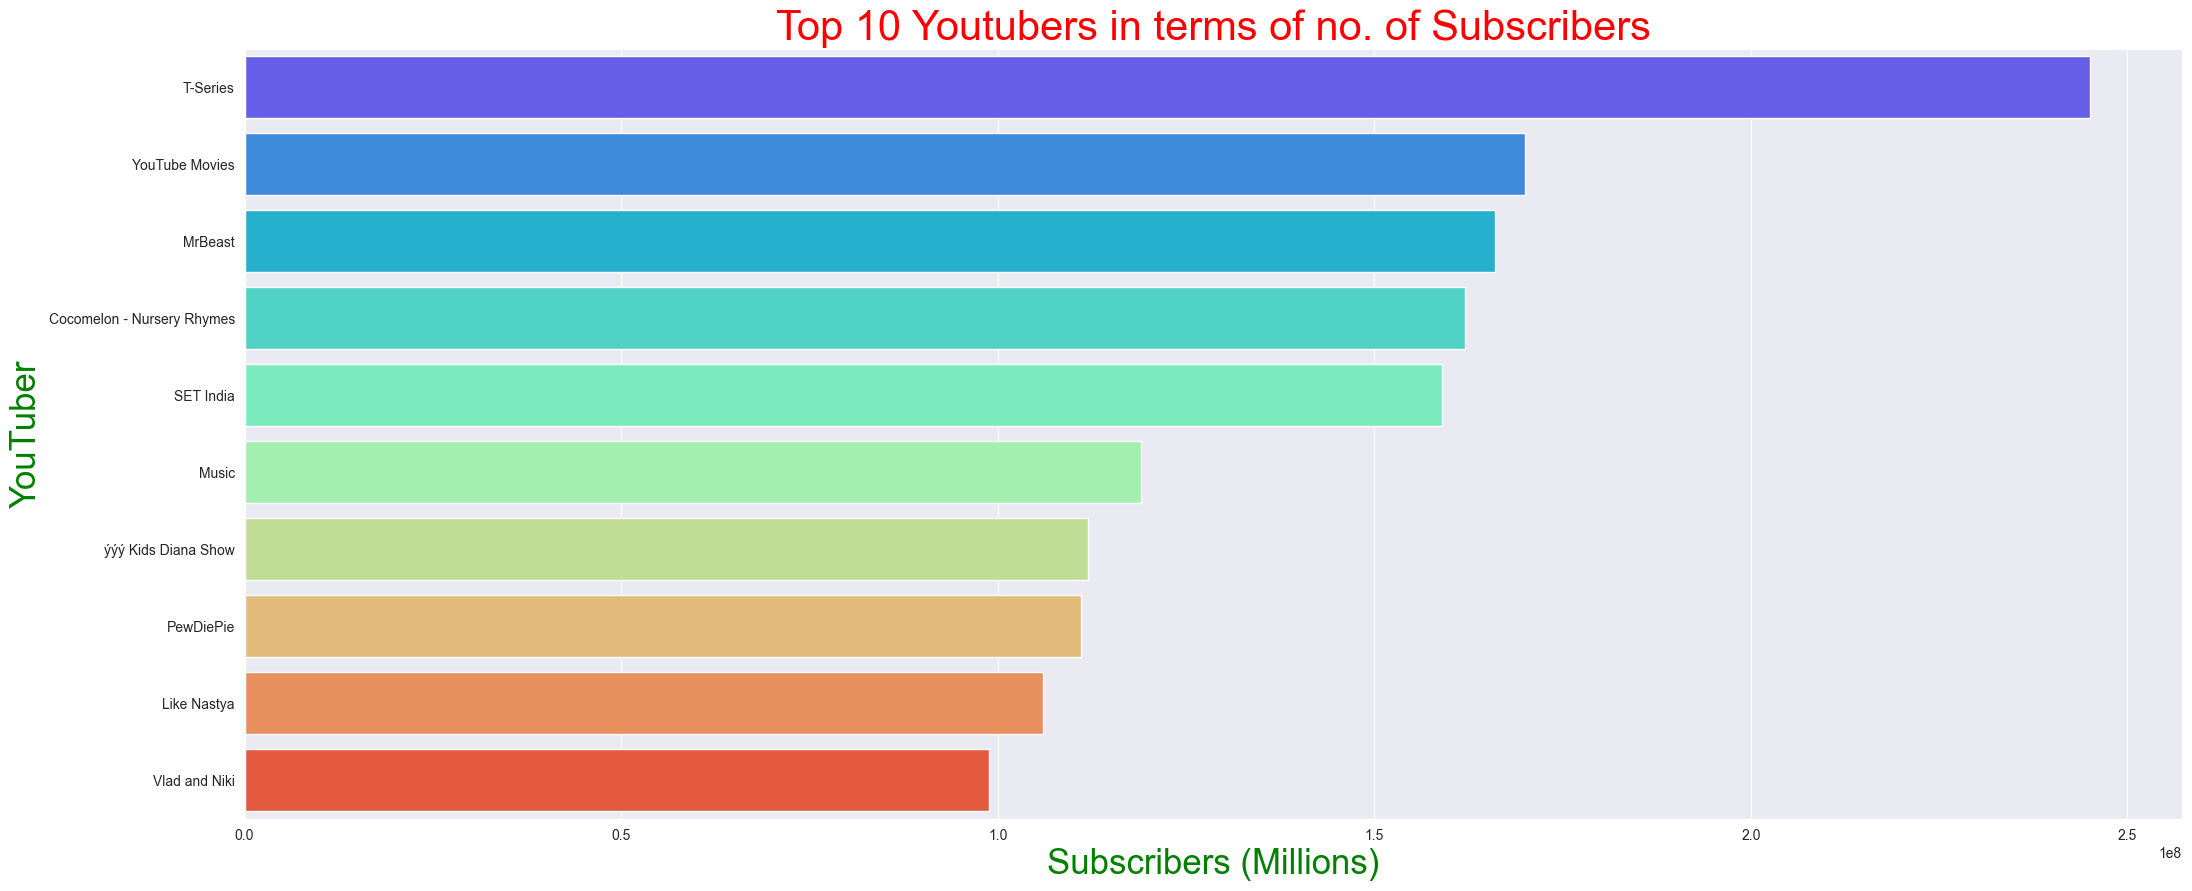

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
sns.barplot(x='subscribers', y='Youtuber', data=top_10_youtubers_by_subscribers, palette='rainbow')
plt.xlabel('Subscribers (Millions)', color='green', size=25)
plt.ylabel('YouTuber', color='green', size=25)
plt.title('Top 10 Youtubers in terms of no. of Subscribers', color='red',size=30)
plt.show()

In [14]:
top_10_youtubers_by_uploads = df[['Youtuber', 'uploads']].sort_values(by='uploads', ascending=False).head(10)

top_10_youtubers_by_uploads

,Youtuber,uploads
95,ABP NEWS,301308
857,GMA Integrated News,296272
747,TV9 Bharatvarsh,293516
33,Aaj Tak,283775
107,IndiaTV,273255
689,KOMPASTV,269050
586,Thairath Online,244899
502,News 24,211620
673,ABS-CBN News,209520
84,TEDx Talks,200933


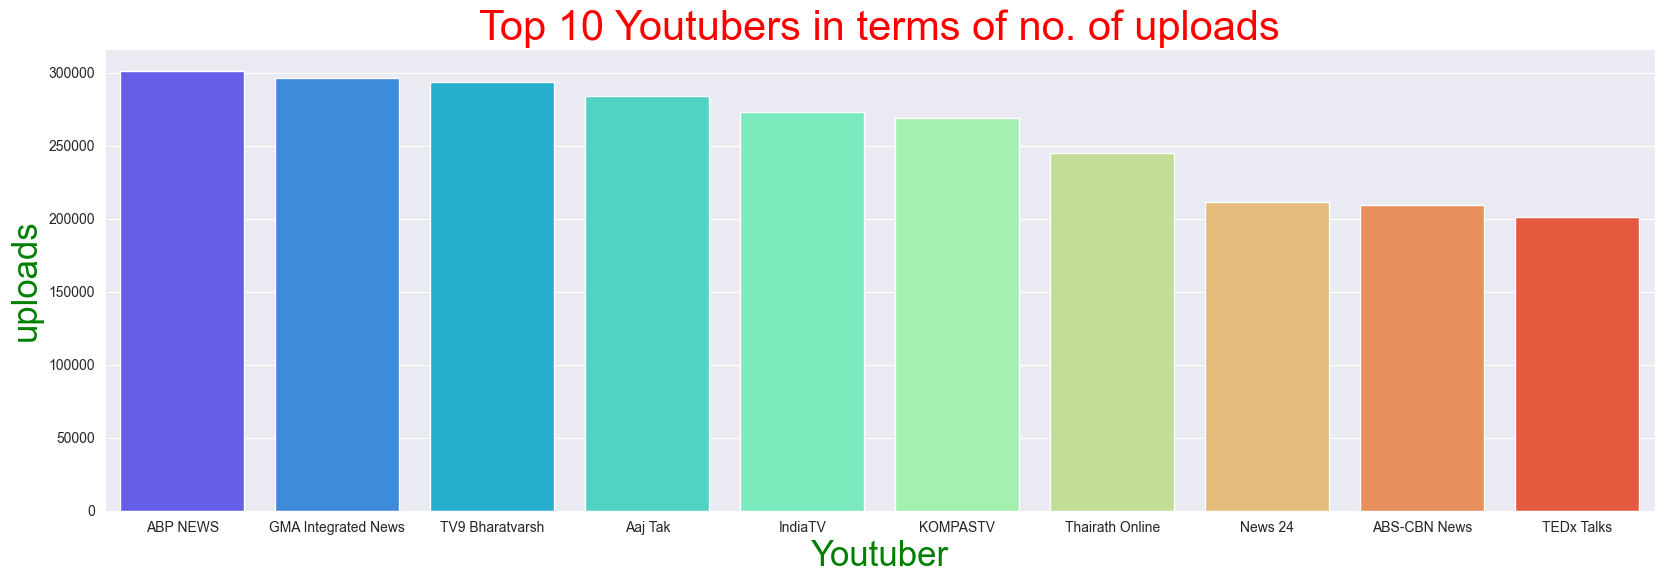

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,6))
sns.barplot(x='Youtuber', y='uploads', data=top_10_youtubers_by_uploads, palette='rainbow')
plt.ylabel('uploads', color='green', size=25)
plt.xlabel('Youtuber', color='green', size=25)
plt.title('Top 10 Youtubers in terms of no. of uploads', color='red',size=30)
plt.show()

In [17]:
top_10_youtubers_by_views = df[['Youtuber', 'video views']].sort_values(by='video views', ascending=False).head(10)

top_10_youtubers_by_views

,Youtuber,video views
0,T-Series,2.280000e+11
3,Cocomelon - Nursery Rhymes,1.640000e+11
4,SET India,1.480000e+11
15,Sony SAB,1.010000e+11
6,ýýý Kids Diana Show,9.324704e+10
8,Like Nastya,9.047906e+10
11,WWE,7.742847e+10
9,Vlad and Niki,7.718017e+10
21,Zee TV,7.313905e+10
26,Colors TV,6.151091e+10


NameError: name 'ax' is not defined

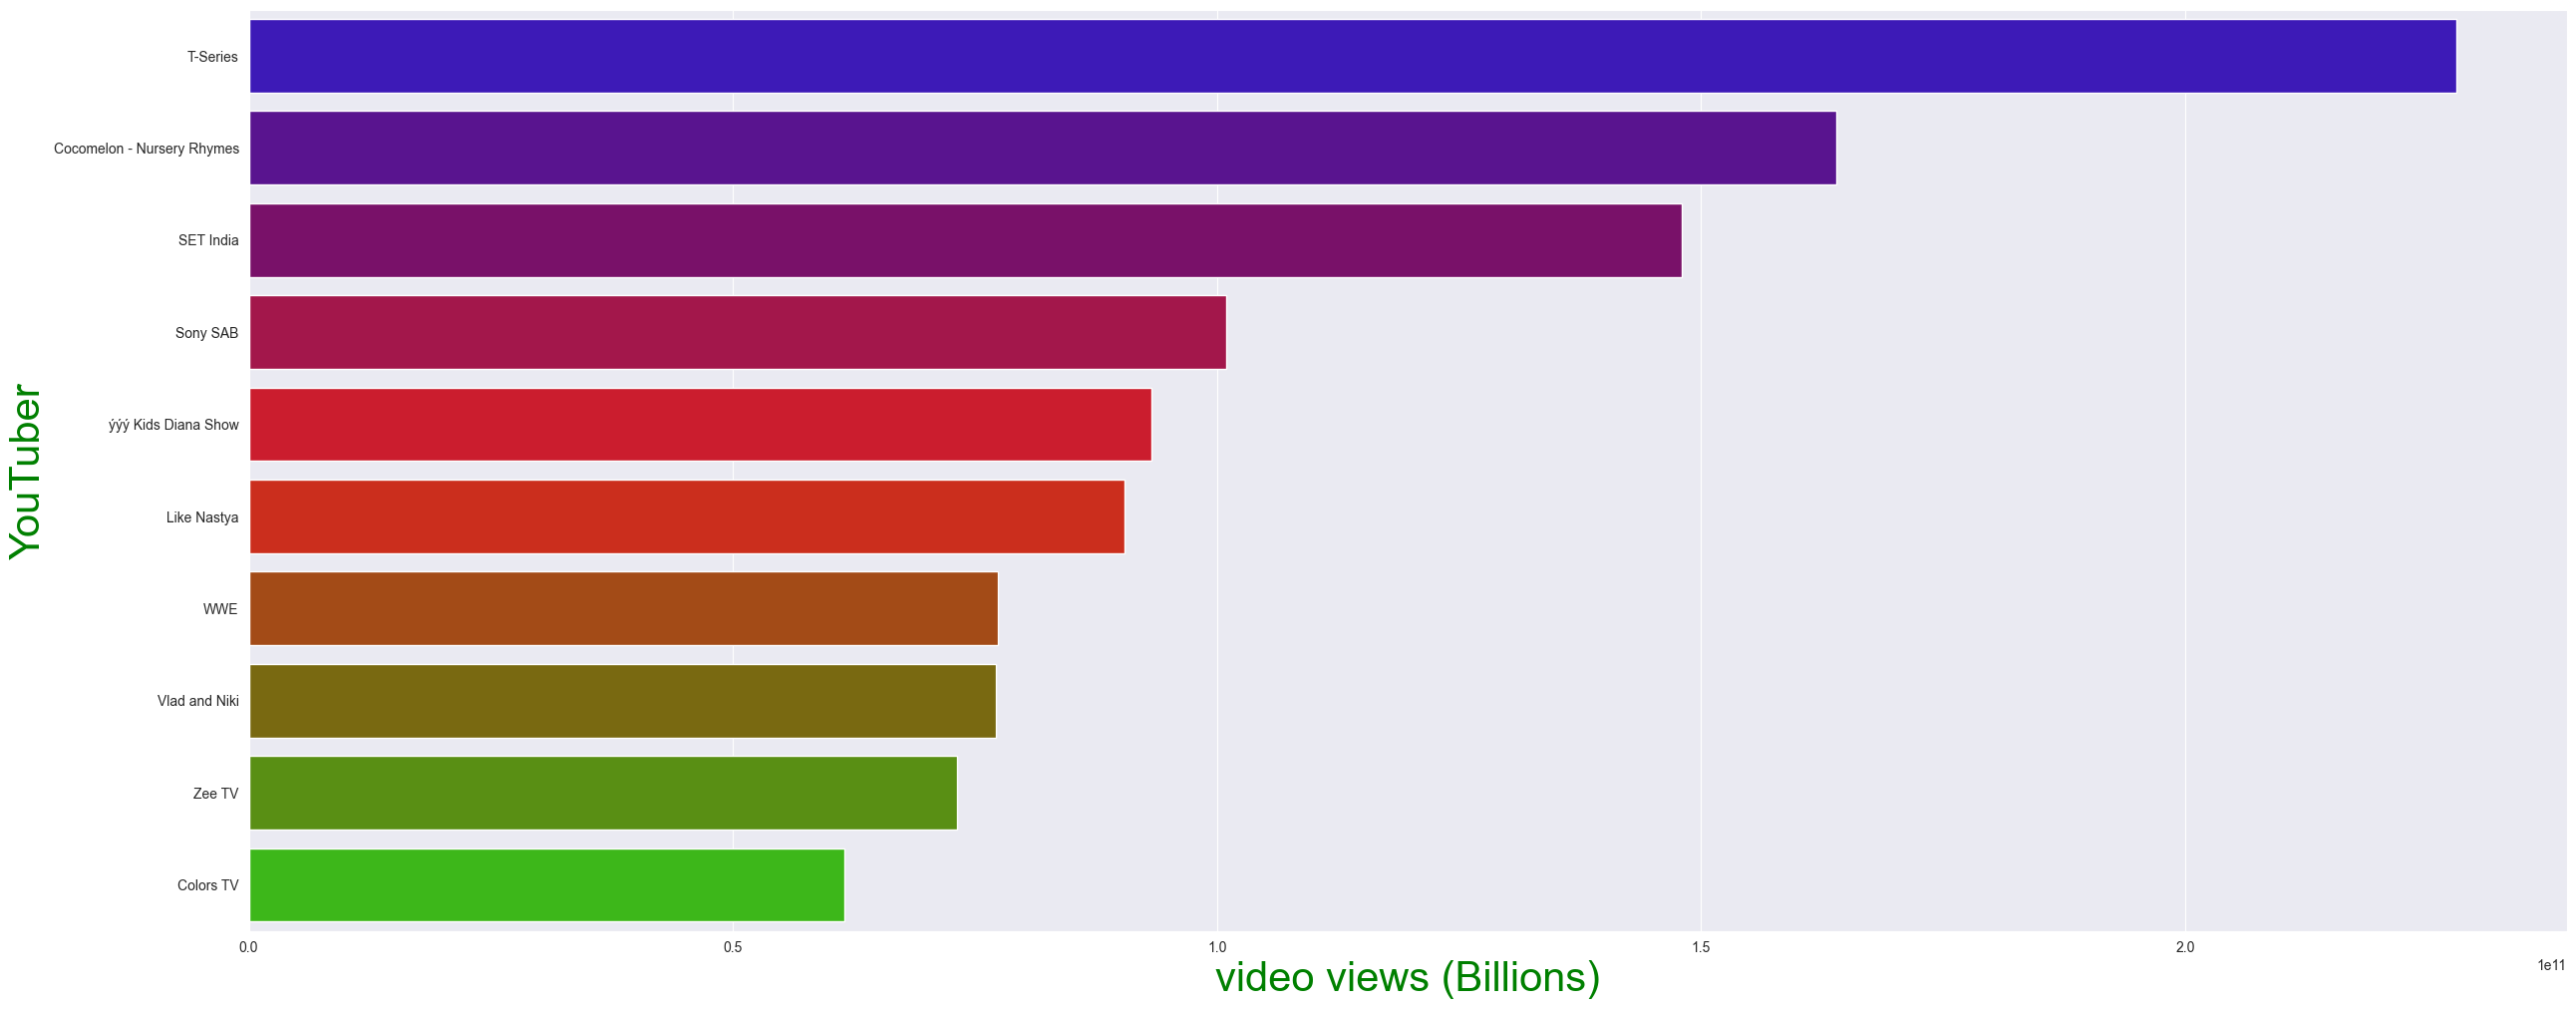

In [18]:
# Convert subscribers to millions
#top_10_youtubers['subscribers'] = top_10_youtubers['subscribers']   # Divide by 1,000,000,000

# Create a bar graph
sns.set_style('darkgrid')
plt.figure(figsize=(30,12))
sns.barplot(x='video views', y='Youtuber', data=top_10_youtubers_by_views, palette='brg')
plt.xlabel('video views (Billions)', color='green', size=30)
plt.ylabel('YouTuber', color='green', size=30)
ax.set_yticklabels([f'{int(label/1e9)}B' for label in ax.get_yticks()])
plt.title('Top 10 Youtubers in terms of no. of video views', color='red',size=30)
#plt.gca().invert_yaxis()  # Invert the y-axis to show the highest subscribers at the top
plt.show()